# Magister en Ciencia de Datos - UDD
## DBAnalytics (Ciencia de Datos aplicada)
### Exploración de datos 2:  
A continuación se explorar las principales caracteristicas de los datasets

In [78]:
import graphlab as gl
import numpy as np
import datetime as dt

### Variables auxiliares

In [2]:
gl.canvas.set_target('ipynb')

In [3]:
%matplotlib inline

### Exploración de datos:

* Paths que contienen los dataset:

In [4]:
DIR = '/Volumes/LEON/MDS _UDD/kkbox-churn-prediction-challenge/'

#### 1. Dataset - Train:

In [5]:
train = gl.load_sframe(DIR + 'train_sframe')

In [6]:
train.shape

(992931, 2)

In [89]:
train.head(2)

msno,is_churn
waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y= ...,1
QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ= ...,1


* Analisamos distribucion de target

In [7]:
Group = train.groupby(key_columns='is_churn', operations={'count': gl.aggregate.COUNT()})
Group

is_churn,count
0,929460
1,63471


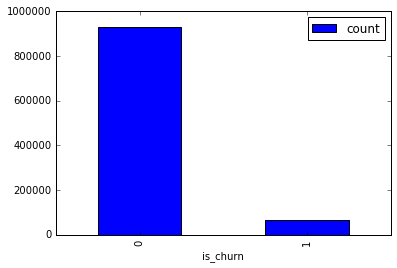

In [40]:
ax = Group.to_dataframe().plot(kind="bar", x="is_churn")
ax.legend(loc=1)

#### 2. Dataset - Members

In [9]:
members_v3 = gl.load_sframe(DIR + 'members_v3_sframe')

In [10]:
members_v3.shape

(6769473, 6)

In [11]:
members_v3.head(2)

msno,city,bd,gender,registered_via,registration_init_time
Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8= ...,1,0,,11,20110911
+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU= ...,1,0,,7,20110914


* Analisamos la distribucion de genero de los miembros

In [12]:
Gender = members_v3.groupby(key_columns='gender', operations={'count': gl.aggregate.COUNT()})

In [22]:
Gender

gender,count
,4429505
male,1195355
female,1144613


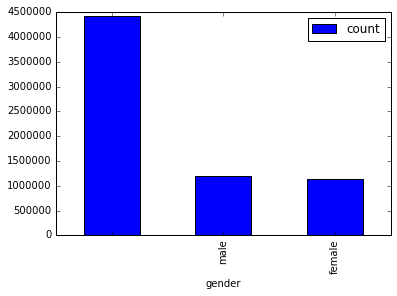

In [39]:
ax = Gender.to_dataframe().plot(kind="bar", x='gender')
ax.legend(loc=1)

* Analizamos el tipo de registro de los miembros del servicio

In [73]:
registered_via = members_v3.groupby(key_columns='registered_via', operations={'count': gl.aggregate.COUNT()}).sort('registered_via', ascending = True)

In [74]:
registered_via

registered_via,count
-1,1
1,43
2,1452
3,1643208
4,2793213
5,3115
6,1213
7,805895
8,3982
9,1482863


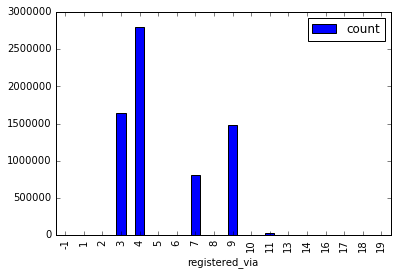

In [75]:
ax = registered_via.to_dataframe().plot(kind="bar", x='registered_via')
ax.legend(loc=1)

* Analizamos la distribucion de edad de los miembros del servicio

In [62]:
bd = members_v3.groupby(key_columns='bd', operations={'count': gl.aggregate.COUNT()})

In [63]:
bd

bd,count
0,4540215
22,112200
21,110574
20,110452
27,102769
23,101500
24,97252
26,92433
25,91514
19,91374


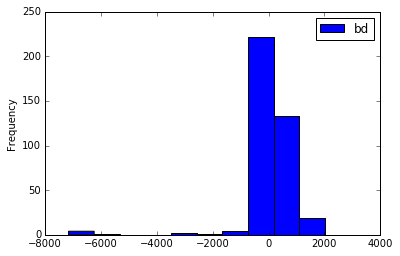

In [64]:
ax = bd.to_dataframe().plot.hist(x="count")
ax.legend(loc=1)

* Analizamos las ciudades

In [70]:
city = members_v3.groupby(key_columns='city', operations={'count': gl.aggregate.COUNT()}).sort('city', ascending = True)

In [71]:
city

city,count
1,4804326
3,27282
4,246848
5,385069
6,135200
7,11610
8,45975
9,47639
10,32482
11,47489


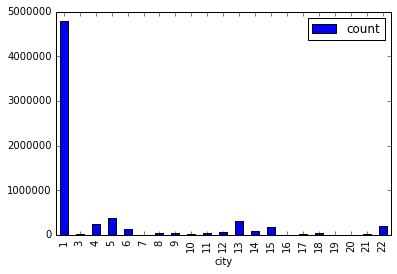

In [72]:
ax = city.to_dataframe().plot(kind="bar", x='city')
ax.legend(loc=1)

* Analizamos fechas de registros

In [80]:
registration_init_time = members_v3.groupby(key_columns='registration_init_time', operations={'count': gl.aggregate.COUNT()}).sort('registration_init_time', ascending = True)

In [81]:
registration_init_time

registration_init_time,count
20040326,250
20040327,1481
20040328,1109
20040329,726
20040330,411
20040331,281
20040401,156
20040402,128
20040403,119
20040404,87


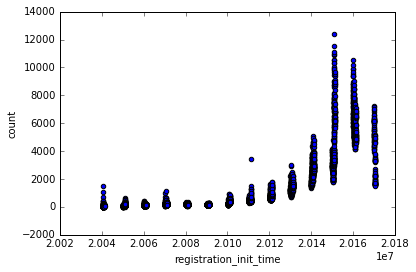

In [87]:
ax = registration_init_time.to_dataframe().plot(kind="scatter", x='registration_init_time', y="count")
ax.legend(loc=1)

### Conclusiones Preliminares 1

* La muestra no se encuentra balanceada, existe una diferencia de mas de 14 veces
* Existen varios outliers en los datasets, tales como: Edad tiene valores negativos y que superan los 100 años.
* La información de genero presenta un alto porcentaje de missing y para la información existe se observa una distribución parecida.
* Los metodos de registro mas usados son: 3, 4, 7 y 9
* Se observa un peak de suscripciones a partir del 2014

### 3. Dataset - Transacciones

In [90]:
transactions = gl.load_sframe(DIR + 'transactions_sframe')

In [91]:
transactions.shape

(21547746, 9)

In [92]:
transactions.head(2)

Columns:
	msno	str
	payment_method_id	int
	payment_plan_days	int
	plan_list_price	int
	actual_amount_paid	int
	is_auto_renew	int
	transaction_date	int
	membership_expire_date	int
	is_cancel	int

Rows: 2

Data:
+-------------------------------+-------------------+-------------------+-----------------+
|              msno             | payment_method_id | payment_plan_days | plan_list_price |
+-------------------------------+-------------------+-------------------+-----------------+
| YyO+tlZtAXYXoZhNr3Vg3+dfVQ... |         41        |         30        |       129       |
| AZtu6Wl0gPojrEQYB8Q3vBSmE2... |         41        |         30        |       149       |
+-------------------------------+-------------------+-------------------+-----------------+
+--------------------+---------------+------------------+------------------------+
| actual_amount_paid | is_auto_renew | transaction_date | membership_expire_date |
+--------------------+---------------+------------------+------------------------+
|        129         |       1       |     20150930     |        20151101        |
|        149         |       1       |     20150930     |        20151031        |
+--------------------+---------------+------------------+------------------------+
+-----------+
| is_cancel |
+-----------+
|     0     |
|     0     |
+-----------+
[2 rows x 9 columns]

* Analizamos renovaciones de suscripciones

In [93]:
is_auto_renew = transactions.groupby(key_columns='is_auto_renew', operations={'count': gl.aggregate.COUNT()})

In [94]:
is_auto_renew

is_auto_renew,count
0,3189796
1,18357950


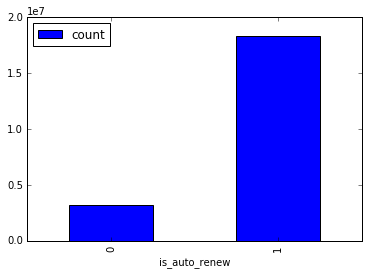

In [96]:
ax = is_auto_renew.to_dataframe().plot(kind="bar", x='is_auto_renew')
ax.legend(loc=2)

* Anazamos las cancelaciones de suscripciones

In [97]:
is_cancel = transactions.groupby(key_columns='is_cancel', operations={'count': gl.aggregate.COUNT()})

In [98]:
is_cancel

is_cancel,count
0,20690895
1,856851


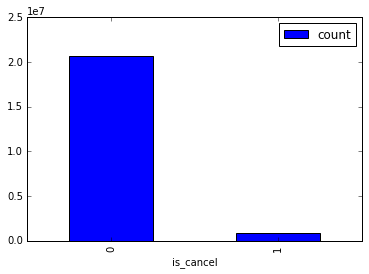

In [100]:
ax = is_cancel.to_dataframe().plot(kind="bar", x='is_cancel')
ax.legend(loc=1)

* Analizamos el metodo de pago

In [101]:
payment_method_id = transactions.groupby(key_columns='payment_method_id', operations={'count': gl.aggregate.COUNT()}).sort('payment_method_id', ascending = True)

In [102]:
payment_method_id

payment_method_id,count
1,12
2,52
3,210
4,15
5,474
6,466
7,1094
8,657
10,1326
11,2129


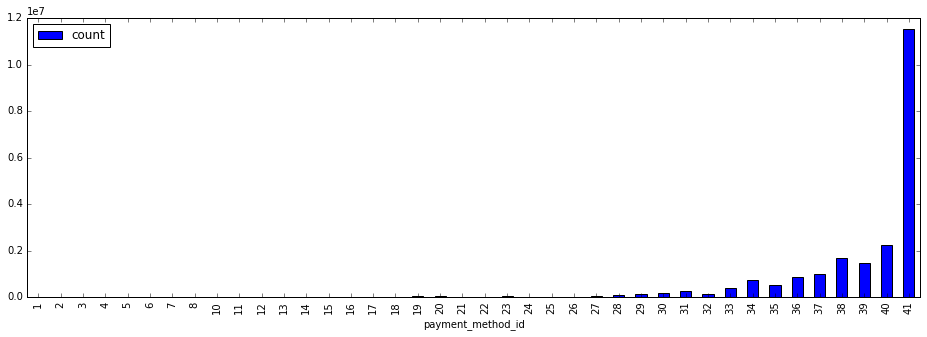

In [109]:
ax = payment_method_id.to_dataframe().plot(kind="bar", x='payment_method_id', figsize=(16,5))
ax.legend(loc=2)

* Analizamos los planes de pago

In [110]:
payment_plan_days = transactions.groupby(key_columns='payment_plan_days', operations={'count': gl.aggregate.COUNT()}).sort('payment_plan_days', ascending = True)

In [111]:
payment_plan_days

payment_plan_days,count
0,870124
1,4759
2,67
3,59
7,577639
10,38216
14,6365
15,21
21,869
30,18956290


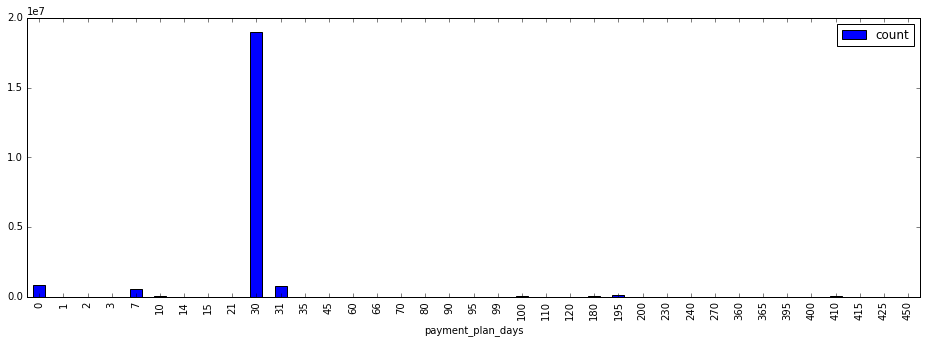

In [113]:
ax = payment_plan_days.to_dataframe().plot(kind="bar", x='payment_plan_days', figsize=(16,5))
ax.legend(loc=1)